In [0]:
# Import Library Files
import warnings
warnings.filterwarnings("ignore")

from PIL import Image
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

import math
import cv2

from tensorflow.keras.models import save_model, load_model



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Utils:

In [0]:
def read_model(path):
  '''
    Load the model

    parameter:
      path(string): Trained Generator model disk path

    return :
      (keras.model)
  '''
  return load_model(path)



In [0]:
def predict(input, train = True, groundTruthImage = None ):
  """
  A function for predicting colors of input sketches using trained generator.

  Parameters:
    input (numpy.array): The black-and-white sketches.
    train (boolean): Is this trainig images or not
    groudTruthImage (numpy.array): Original Color Images.
  """

  ganModel_path = "/content/drive/My Drive/Case Study 2/NewModel/generator.h5"

  generator = read_model(ganModel_path)

  pred = generator.predict(input)

  # Rescaling the generated color images and input sketches to the range [0, 255].
  pred = (pred+1)/2.0
  input = (input+1)/2.0 
  if train:
    groundTruthImage = (groundTruthImage+1)/2.0 

  if train:
    # Displaying the generated color images from the generator.
    f, a = plt.subplots(input.shape[0], 3,\
                        figsize=(1.2 * input.shape[0],\
                                5 * input.shape[0]))
    a = a.flatten()
    idx = 0
    
    for sket, pic, originalPic in zip(input, pred, groundTruthImage):
      a[idx].imshow(sket) 
      a[idx].axis('off')
      a[idx + 1].imshow(originalPic) 
      a[idx + 1].axis('off')
      a[idx + 2].imshow(pic); 
      a[idx + 2].axis('off')
      idx += 3

  else:

    # Displaying the generated color images from the generator.
    f, a = plt.subplots(input.shape[0], 2,\
                        figsize=(.7 * input.shape[0],\
                                4 * input.shape[0]))
    a = a.flatten()
    idx = 0
    
    for sket, pic in zip(input, pred):
      a[idx].imshow(sket) 
      a[idx].axis('off')
      a[idx+1].imshow(pic); 
      a[idx+1].axis('off')
      idx += 2


  plt.subplots_adjust(wspace=.1, hspace=.1)
  plt.show()

##### Generating the colored images for not used for __taining data__ 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

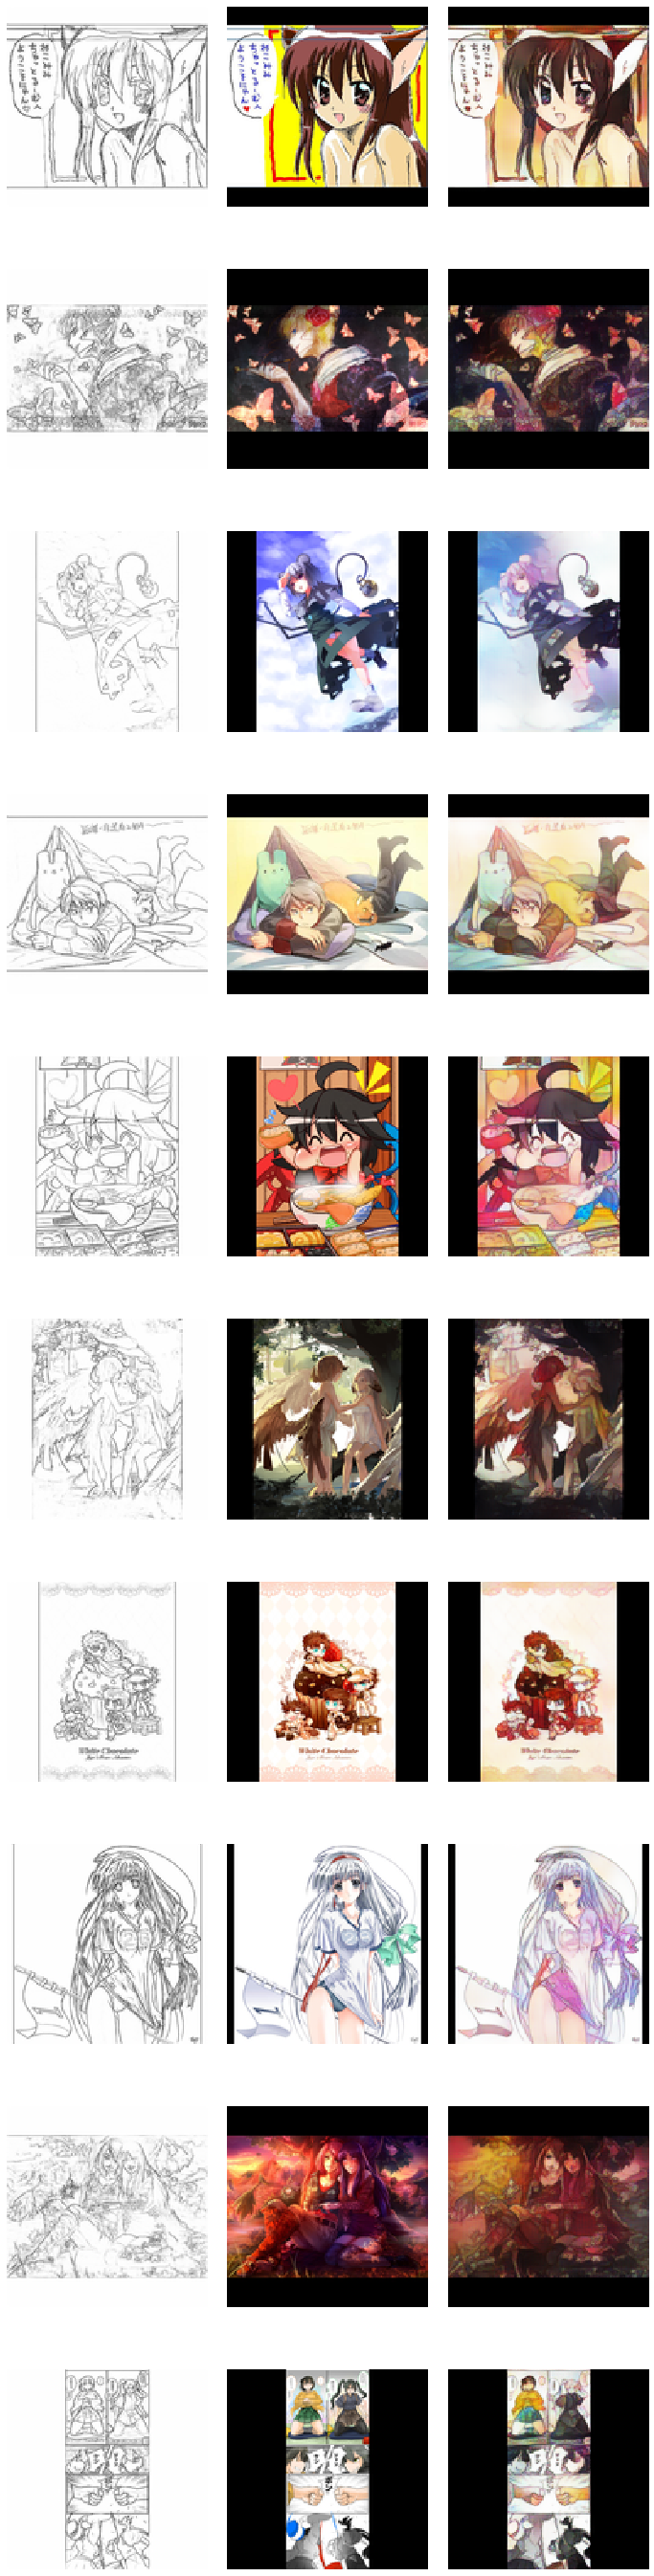

In [30]:
train_sketch_path = glob.glob("/content/drive/My Drive/Case Study 2/Data/sketch/0002/*.png")
train_sketch_path = np.array(train_sketch_path)

train_image_path = glob.glob("/content/drive/My Drive/Case Study 2/Data/src/0002/*.png")
train_image_path = np.array(train_image_path)

train_image_path.sort()
train_sketch_path.sort()


sketches = []
images = []
idxs = np.random.randint(0, len(test_sketch_path), 10) 

for sket, img in zip(train_sketch_path[idxs], train_image_path[idxs]):
    sketches.append(np.array(Image.open(sket).convert('RGB')))
    images.append(np.array(Image.open(img).convert('RGB')))



sketches = (np.array(sketches, dtype='float32')-127.5)/127.5
images = (np.array(images, dtype='float32') - 127.5)/127.5
#print (len(test_sketch_path))

predict(sketches, groundTruthImage = images)

### Test Data Result

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

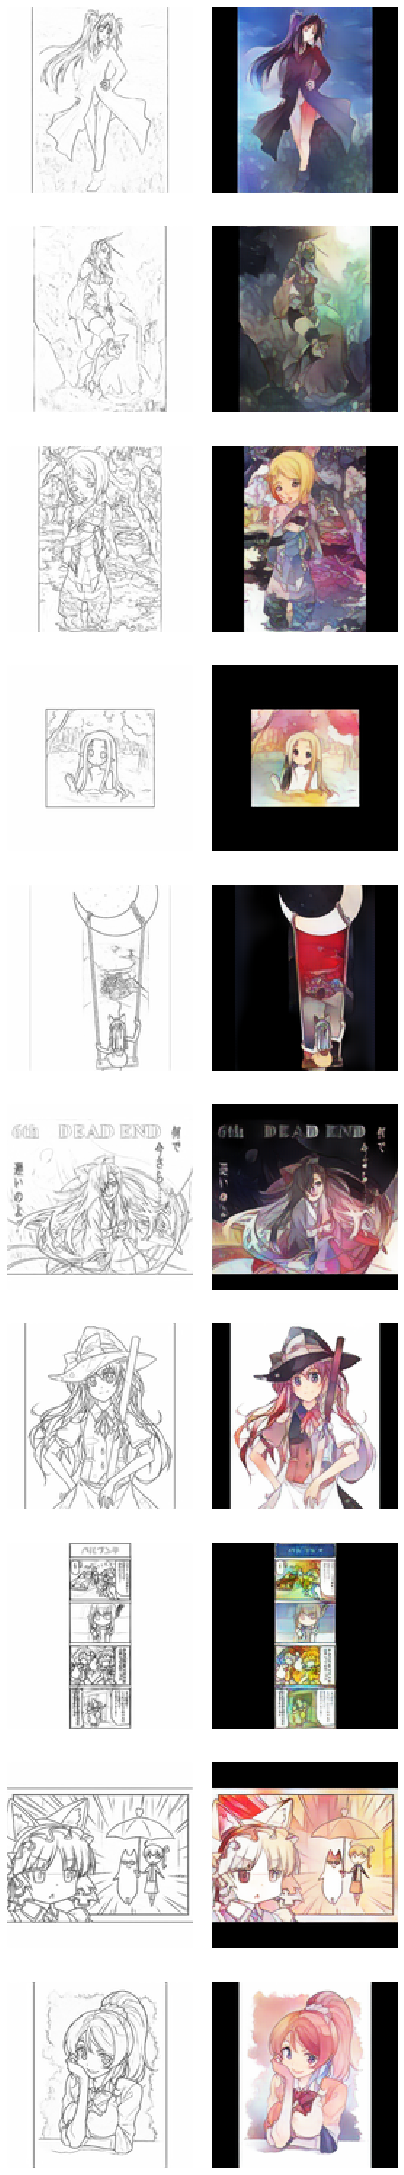

In [29]:
test_sketch_path = glob.glob("/content/drive/My Drive/Case Study 2/Data/sketch/0003/*.png")
test_sketch_path = np.array(test_sketch_path)

sketches = []

idxs = np.random.randint(0, len(test_sketch_path), 10) 

for sket in test_sketch_path[idxs]:
    sketches.append(np.array(Image.open(sket).convert('RGB')))

sketches = (np.array(sketches, dtype='float32')-127.5)/127.5
predict(sketches, train = False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


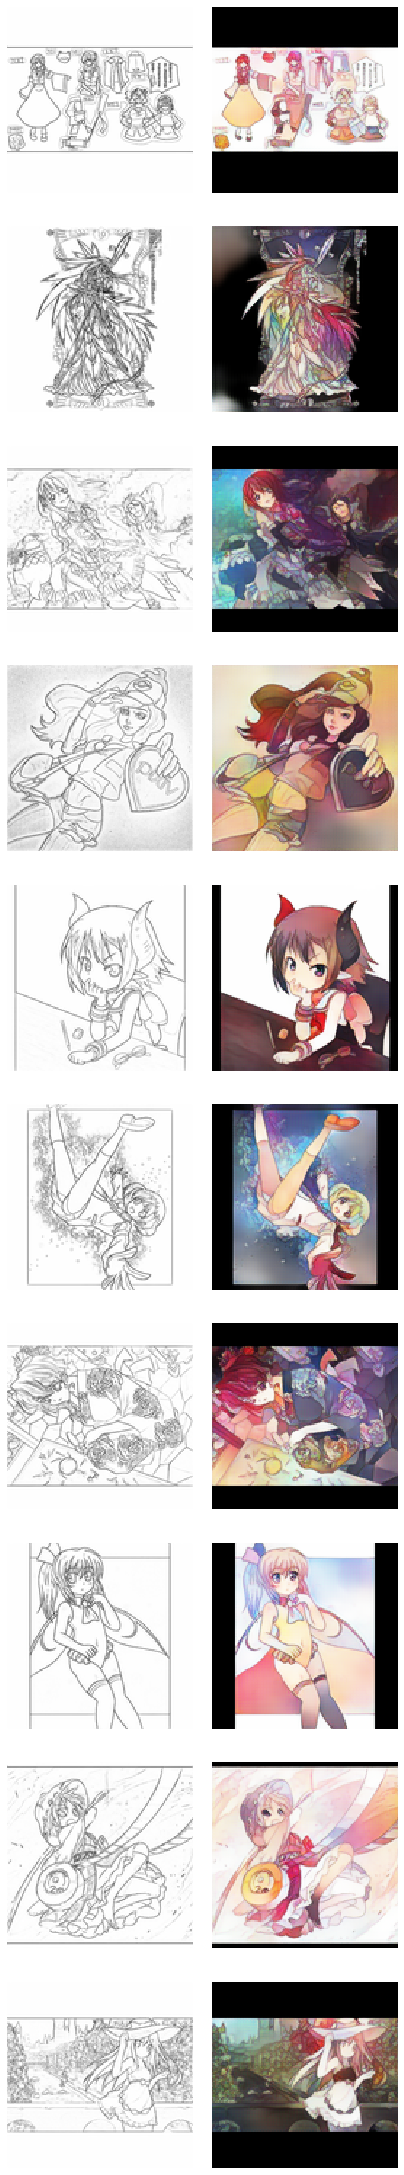

In [31]:
test_sketch_path = glob.glob("/content/drive/My Drive/Case Study 2/Data/sketch/0003/*.png")
test_sketch_path = np.array(test_sketch_path)

sketches = []

idxs = np.random.randint(0, len(test_sketch_path), 10) 

for sket in test_sketch_path[idxs]:
    sketches.append(np.array(Image.open(sket).convert('RGB')))

sketches = (np.array(sketches, dtype='float32')-127.5)/127.5
predict(sketches, train = False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


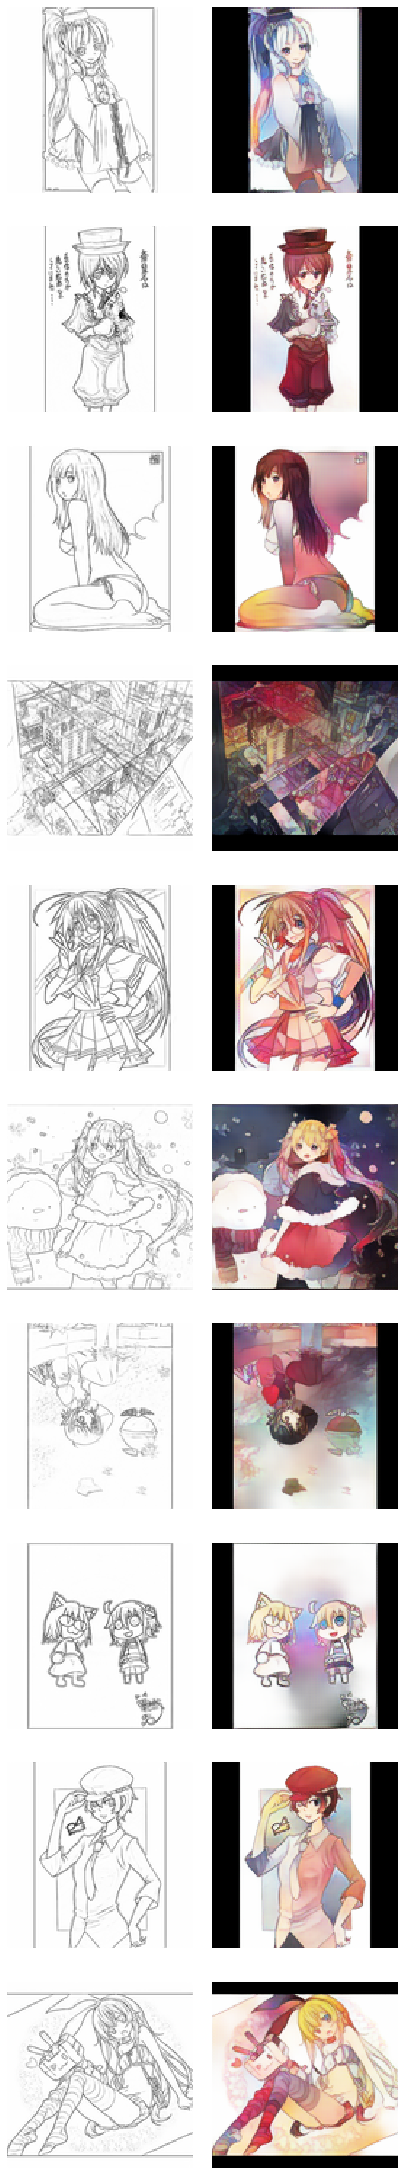

In [39]:
test_sketch_path = glob.glob("/content/drive/My Drive/Case Study 2/Data/sketch/0004/*.png")
test_sketch_path = np.array(test_sketch_path)

sketches = []

idxs = np.random.randint(0, len(test_sketch_path), 10) 

for sket in test_sketch_path[idxs]:
    sketches.append(np.array(Image.open(sket).convert('RGB')))

sketches = (np.array(sketches, dtype='float32')-127.5)/127.5
predict(sketches, train = False)